Obtener un dataset con las valoraciones de Bitcoin de los últimos 365 días.

Con lo que vimos ayer en la clase de API, intenta conseguir ese dataset.  

Graficar.

In [1]:
#Importación de librerías necesarias:
import pandas as pd
import csv
import requests
import ast
import matplotlib
import matplotlib.pyplot as plt
import datetime

In [2]:
# 1.- Consumir la API http://numbersapi.com/1..10
ct = str(int(datetime.datetime.now().timestamp()))
c2 = datetime.datetime.now() - datetime.timedelta(days=365)
ct2 = str(int(c2.timestamp()))

APIurl = "https://api.binance.com/api/v3/klines?symbol=BTCUSDT&interval=1d&limit=365&startTime="+ct2+"000&endTime="+ct+"000"
APIresp = requests.get(APIurl)
print(APIresp.ok)
print(APIresp.status_code)
print(APIresp.elapsed)
x = ast.literal_eval(APIresp.text)
df = pd.DataFrame(x)
df = df.drop(df.columns[[0,1,2,3,5,7,8,9,10,11]], axis='columns')
df.rename( columns={4 :'Close price'}, inplace=True)
df.rename( columns={6 :'Fecha'}, inplace=True)
df['Close price'] = pd.to_numeric(df['Close price'])
df

True
200
0:00:00.443196


,Close price,Fecha
0,36809.34,1643241599999
1,37160.10,1643327999999
2,37716.56,1643414399999
3,38166.84,1643500799999
4,37881.76,1643587199999
...,...,...
360,22783.55,1674345599999
361,22707.88,1674431999999
362,22916.45,1674518399999
363,22632.89,1674604799999


In [3]:
from datetime import datetime
listaDate = []
for date in df['Fecha']:
    listaDate.append(datetime.fromtimestamp(date//1000))
df.index = listaDate
df

,Close price,Fecha
2022-01-27 00:59:59,36809.34,1643241599999
2022-01-28 00:59:59,37160.10,1643327999999
2022-01-29 00:59:59,37716.56,1643414399999
2022-01-30 00:59:59,38166.84,1643500799999
2022-01-31 00:59:59,37881.76,1643587199999
...,...,...
2023-01-22 00:59:59,22783.55,1674345599999
2023-01-23 00:59:59,22707.88,1674431999999
2023-01-24 00:59:59,22916.45,1674518399999
2023-01-25 00:59:59,22632.89,1674604799999


<function matplotlib.pyplot.show(close=None, block=None)>

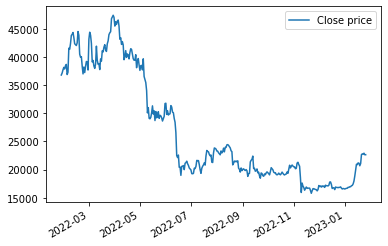

In [4]:
# Debo convertir antes al formato datetime para que lo reconozca como índice timestamp
df.plot(kind='line', y='Close price')
plt.show